<a href="https://colab.research.google.com/github/bishan5/A-Predictive-Traffic-Flow-Modelling-for-ITS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Necessary Libraries**

In [ ]:
# Basic data manipulation and numerical operations
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Google Colab specific
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FILE_PATH = '/content/drive/MyDrive/Metro_Interstate_Traffic_Volume.csv'
data = pd.read_csv(FILE_PATH)

In [ ]:
data

,Timestamp,Traffic_volume,Holiday,Temp,Rain_1h,Snow_1h,Clouds_all,Weather_main,weather_description
0,02/10/2012 09:00,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds
1,02/10/2012 10:00,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds
2,02/10/2012 11:00,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds
3,02/10/2012 12:00,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds
4,02/10/2012 13:00,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds
...,...,...,...,...,...,...,...,...,...
48199,30/09/2018 19:00,3543,NaN,283.45,0.0,0.0,75,Clouds,broken clouds
48200,30/09/2018 20:00,2781,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds
48201,30/09/2018 21:00,2159,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm
48202,30/09/2018 22:00,1450,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds


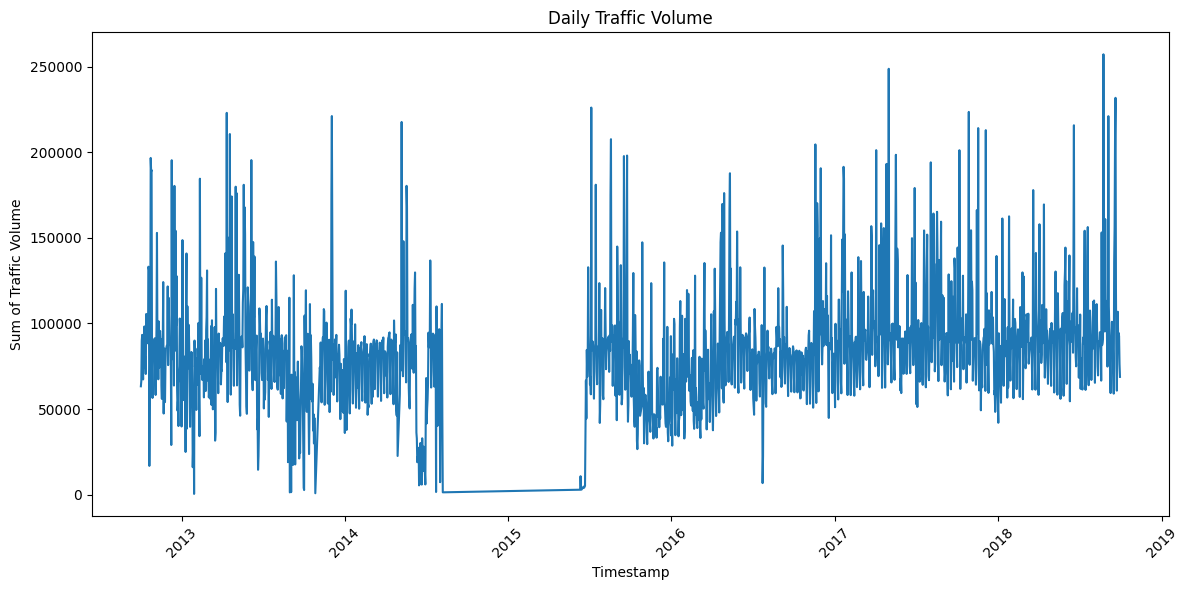

In [ ]:
# Total Daily Traffic Volume Over Time
# Convert the 'Timestamp' column to datetime objects if it's not already
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')

# Group data by day and sum the traffic volume
daily_traffic = data.groupby(data['Timestamp'].dt.date)['Traffic_volume'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_traffic.index, daily_traffic.values)
plt.xlabel('Timestamp')
plt.ylabel('Sum of Traffic Volume')
plt.title('Daily Traffic Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In the time series plot above, we can see significant data missing between 08/08/2014 and 11/06/2015. As a large portion of data (nearly 10 months) is missing and sufficient data for training and testing is available after 11/06/2015, I decided to split the dataset and use data after 01/07/2015 for model development, training, and testing.

In [ ]:
# Filter data after the specified timestamp.
data = data[data['Timestamp'] >= pd.to_datetime('01/07/2015 00:00', format='%d/%m/%Y %H:%M')]

# Reset the index of the DataFrame to the default integer index.
data = data.reset_index(drop=True)


# Display the new DataFrame.
data

,Timestamp,Traffic_volume,Holiday,Temp,Rain_1h,Snow_1h,Clouds_all,Weather_main,weather_description
0,2015-07-01 00:00:00,737,NaN,289.20,0.0,0.0,1,Clear,sky is clear
1,2015-07-01 01:00:00,444,NaN,289.40,0.0,0.0,1,Clear,sky is clear
2,2015-07-01 02:00:00,347,NaN,289.19,0.0,0.0,1,Clear,sky is clear
3,2015-07-01 03:00:00,356,NaN,288.74,0.3,0.0,1,Rain,light rain
4,2015-07-01 04:00:00,936,NaN,288.07,0.0,0.0,1,Clear,sky is clear
...,...,...,...,...,...,...,...,...,...
32042,2018-09-30 19:00:00,3543,NaN,283.45,0.0,0.0,75,Clouds,broken clouds
32043,2018-09-30 20:00:00,2781,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds
32044,2018-09-30 21:00:00,2159,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm
32045,2018-09-30 22:00:00,1450,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds


Between 08/08/2014 and 11/06/2015, there should be 28,512 traffic volume records, but we can see 32,047 records, indicating some duplicate data.

In [ ]:
# Drop duplicate rows based on the 'Timestamp' column, keeping the first occurrence.
data = data.drop_duplicates(subset=['Timestamp'], keep='first')

# Reset the index of the DataFrame to the default integer index.
data = data.reset_index(drop=True)

# Display the first few rows of the updated DataFrame to verify the changes.
data


,Timestamp,Traffic_volume,Holiday,Temp,Rain_1h,Snow_1h,Clouds_all,Weather_main,weather_description
0,2015-07-01 00:00:00,737,NaN,289.20,0.0,0.0,1,Clear,sky is clear
1,2015-07-01 01:00:00,444,NaN,289.40,0.0,0.0,1,Clear,sky is clear
2,2015-07-01 02:00:00,347,NaN,289.19,0.0,0.0,1,Clear,sky is clear
3,2015-07-01 03:00:00,356,NaN,288.74,0.3,0.0,1,Rain,light rain
4,2015-07-01 04:00:00,936,NaN,288.07,0.0,0.0,1,Clear,sky is clear
...,...,...,...,...,...,...,...,...,...
26523,2018-09-30 19:00:00,3543,NaN,283.45,0.0,0.0,75,Clouds,broken clouds
26524,2018-09-30 20:00:00,2781,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds
26525,2018-09-30 21:00:00,2159,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm
26526,2018-09-30 22:00:00,1450,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds


We can see some missing timestamps and corresponding records, so I fixed them by filling missing numerical data with the average of surrounding values and filling missing categorical data with the previous value (forward fill).

In [ ]:
# Convert the 'Timestamp' column to datetime objects if it isn't already
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')

# Set Timestamp as the index for easier alignment
data = data.set_index('Timestamp')

# Generate a complete hourly date range for the entire dataset
full_time_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='H')

# Reindex the data to include all timestamps
data_reindexed = data.reindex(full_time_range)

# Reset the index and rename it back to 'Timestamp'
data_reindexed = data_reindexed.reset_index().rename(columns={'index': 'Timestamp'})


# Fill missing numerical data with the average of surrounding values
numerical_cols = ['Traffic_volume', 'Temp', 'Rain_1h', 'Snow_1h', 'Clouds_all']
data_reindexed[numerical_cols] = data_reindexed[numerical_cols].interpolate(method='linear')

# Cast Traffic_volume to integer
data_reindexed['Traffic_volume'] = data_reindexed['Traffic_volume'].round().astype(int)

# Round other numerical columns to 2 decimal places
for col in ['Temp', 'Rain_1h', 'Snow_1h', 'Clouds_all']:
    data_reindexed[col] = data_reindexed[col].round(2)

# Fill missing categorical data with the previous value (forward fill)
categorical_cols = ['Holiday', 'Weather_main', 'weather_description']
data_reindexed[categorical_cols] = data_reindexed[categorical_cols].fillna(method='ffill')

# Sort the DataFrame by Timestamp
data = data_reindexed.sort_values('Timestamp')

# Final DataFrame
print(data)


                Timestamp  Traffic_volume    Holiday    Temp  Rain_1h  \
0     2015-07-01 00:00:00             737        NaN  289.20      0.0   
1     2015-07-01 01:00:00             444        NaN  289.40      0.0   
2     2015-07-01 02:00:00             347        NaN  289.19      0.0   
3     2015-07-01 03:00:00             356        NaN  288.74      0.3   
4     2015-07-01 04:00:00             936        NaN  288.07      0.0   
...                   ...             ...        ...     ...      ...   
28507 2018-09-30 19:00:00            3543  Labor Day  283.45      0.0   
28508 2018-09-30 20:00:00            2781  Labor Day  282.76      0.0   
28509 2018-09-30 21:00:00            2159  Labor Day  282.73      0.0   
28510 2018-09-30 22:00:00            1450  Labor Day  282.09      0.0   
28511 2018-09-30 23:00:00             954  Labor Day  282.12      0.0   

       Snow_1h  Clouds_all  Weather_main     weather_description  
0          0.0         1.0         Clear            sky 

<ipython-input-9-1bd414abdf75>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='H')
<ipython-input-9-1bd414abdf75>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_reindexed[categorical_cols] = data_reindexed[categorical_cols].fillna(method='ffill')


In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                 Timestamp  Traffic_volume          Temp       Rain_1h  \
count                28512    28512.000000  28512.000000  28512.000000   
mean   2017-02-13 23:30:00     3314.809659    282.688878      0.404692   
min    2015-07-01 00:00:00        0.000000    243.390000      0.000000   
25%    2016-04-22 23:45:00     1319.750000    273.490000      0.000000   
50%    2017-02-13 23:30:00     3509.000000    284.540000      0.000000   
75%    2017-12-07 23:15:00     4950.250000    292.790000      0.000000   
max    2018-09-30 23:00:00     7280.000000    310.070000   9831.300000   
std                    NaN     1961.336978     12.362729     58.226344   

            Snow_1h    Clouds_all  
count  28512.000000  28512.000000  
mean       0.000254     42.135750  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000     40.000000  
75%        0.000000     90.000000  
max        0.510000    100.000000  
std        0.008032     

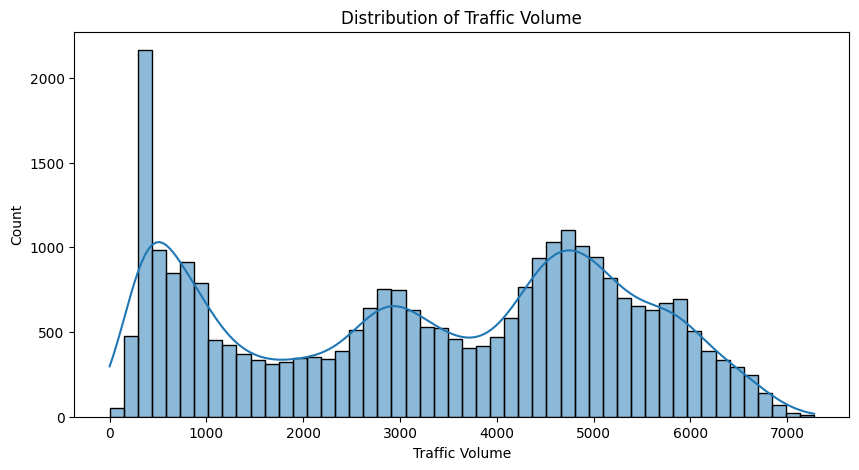

In [ ]:
# Distribution of Traffic Volume
plt.figure(figsize=(10,5))
sns.histplot(data['Traffic_volume'], bins=50, kde=True)
plt.title("Distribution of Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Count")
plt.show()

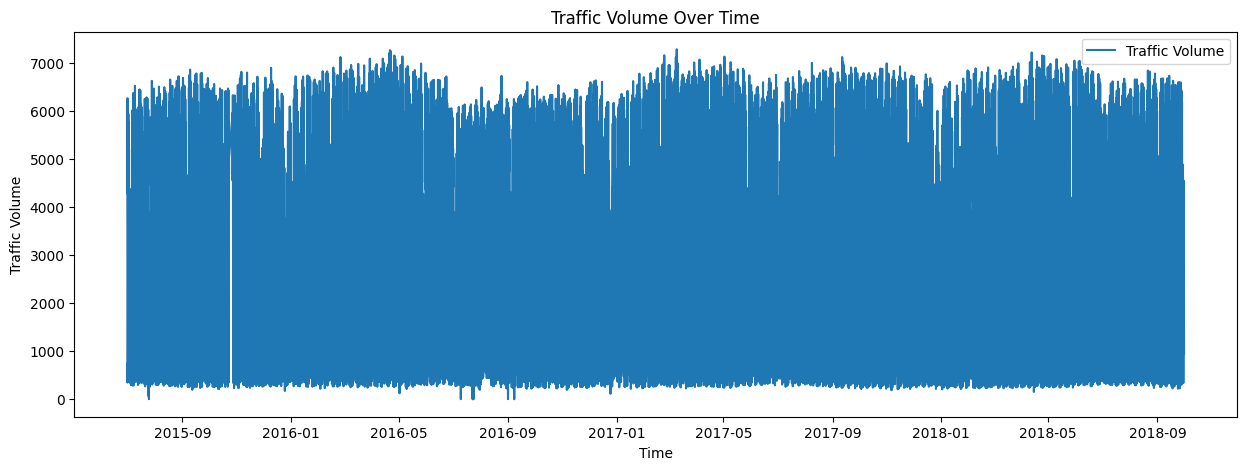

In [ ]:
# Time Series Analysis
plt.figure(figsize=(15,5))
plt.plot(data['Timestamp'], data['Traffic_volume'], label='Traffic Volume')
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume Over Time")
plt.legend()
plt.show()

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Weather_main'] = label_encoder.fit_transform(data['Weather_main'])

# Convert 'Holiday' column values: NaN to 0, others to 1
data['Holiday'] = data['Holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [ ]:
# extract features
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Weekday'] = data['Timestamp'].dt.weekday
data['Is_night'] = data['Hour'].isin([22,23,0,1,2,3,4,5])
data['Is_weekend'] = data['Weekday'].isin([5, 6])


In [ ]:
# 1. Encode 'Year' (Ordinal Encoding from 2015 to 2018)
data['Year'] = data['Year'] -2015
data['Is_weekend'] = data['Is_weekend'].astype(int)
data['Is_night'] = data['Is_night'].astype(int)


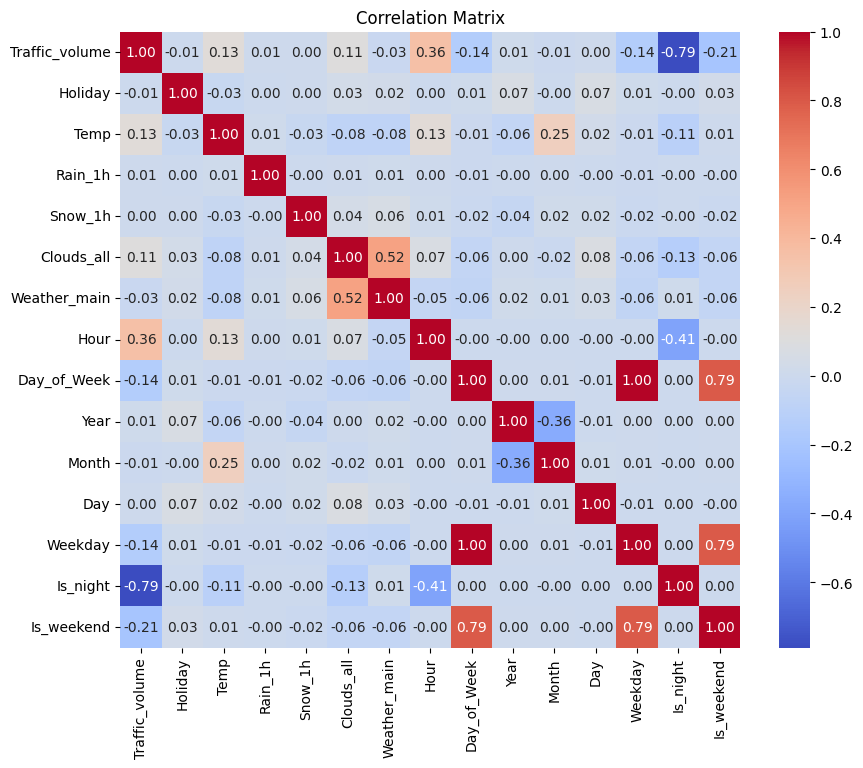

In [ ]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

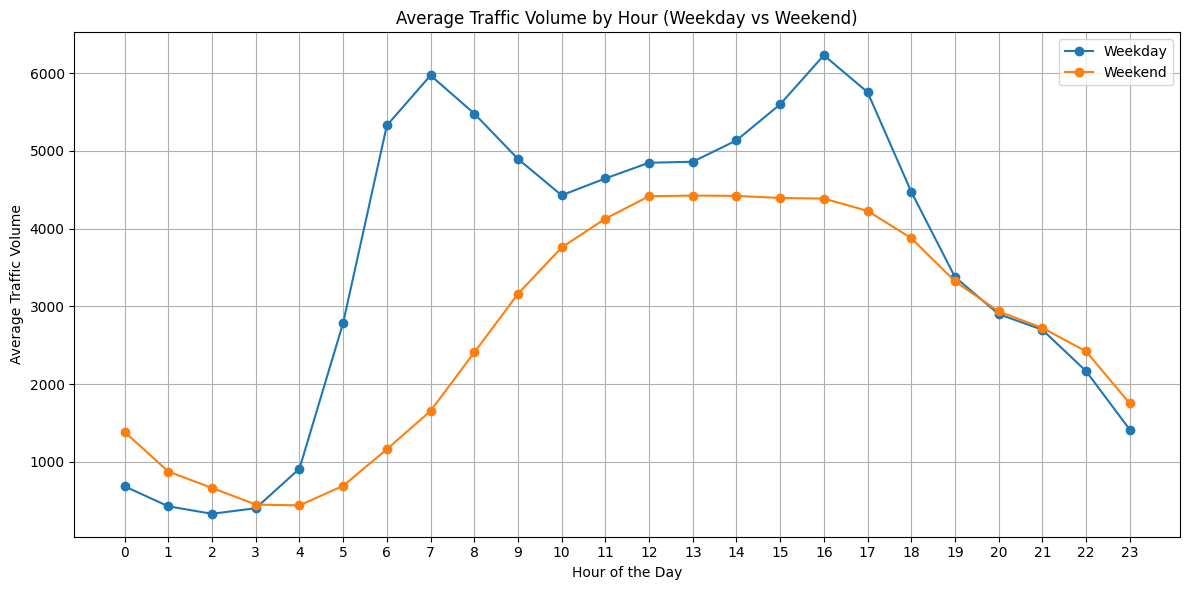

In [ ]:
# Traffic volume trends by hour weekday and weekend
# Filter weekdays and weekends
weekday_data = data[data['Is_weekend'] == 0]
weekend_data = data[data['Is_weekend'] == 1]

# Group by hour and calculate average traffic volume for weekdays
weekday_hourly_traffic = weekday_data.groupby('Hour')['Traffic_volume'].mean()

# Group by hour and calculate average traffic volume for weekends
weekend_hourly_traffic = weekend_data.groupby('Hour')['Traffic_volume'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_traffic.index, weekday_hourly_traffic.values, label='Weekday', marker='o')
plt.plot(weekend_hourly_traffic.index, weekend_hourly_traffic.values, label='Weekend', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Hour (Weekday vs Weekend)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data = data.sort_values('Timestamp')

In [ ]:
Clean_Metro_Interstate_Traffic_Volume = data

In [ ]:
# Download the DataFrame as a CSV file without the index
data.to_csv('Clean_Metro_Interstate_Traffic_Volume.csv', encoding='utf-8', index=False)
files.download('Clean_Metro_Interstate_Traffic_Volume.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>